In [356]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [357]:
surrogate_configs = [
    "NoAdv_Surrogate_Data_V1",
    "NoAdv_Surrogate_Data_V2",
    "NoAdv_Surrogate_Data_V3",
    "NoAdv_Surrogate_Data_V4",
    "NoAdv_Surrogate_Data_V5",
]

targets = [
    "2024-05-10_01-41-38_lightslategray-operation",
    "2024-05-09_11-28-00_lemonchiffon-carry",
    "2024-05-09_14-13-30_orangered-collection",
    "2024-05-09_17-17-19_lightsalmon-manage",
    "2024-05-09_23-02-23_lightcoral-owner",
    "2024-05-09_20-00-28_mediumpurple-class",
]

In [358]:
def get_transferabilities(target):
    path = f"/app/wafcraft/results/dataoverlap_nonadv_experiments/target_{target}/transferability.csv"
    df = pd.read_csv(path)

    means = {}
    deviations = {}

    for config in surrogate_configs:
        # get all entries in df where config column is equal to config
        config_df = df[df["config"] == config]
        mean_samples_evaded_percentage = config_df["samples_evaded_percentage"].mean()
        stddevation_samples_evaded_percentage = config_df[
            "samples_evaded_percentage"
        ].std()
        means[config] = mean_samples_evaded_percentage
        deviations[config] = stddevation_samples_evaded_percentage

    return means, deviations

In [359]:
all_means = {}
all_deviations = {}
for target in targets:
    means, deviations = get_transferabilities(target)
    all_means[target] = means
    all_deviations[target] = deviations

print(all_means)
# calulate the mean and std deviation of the means
means = {}
deviations = {}
for config in surrogate_configs:
    config_means = []
    config_deviations = []
    for target in targets:
        config_means.append(all_means[target][config])
        config_deviations.append(all_deviations[target][config])
    means[config] = sum(config_means) / len(config_means)
    deviations[config] = sum(config_deviations) / len(config_deviations)


print(means)
print(deviations)

{'2024-05-10_01-41-38_lightslategray-operation': {'NoAdv_Surrogate_Data_V1': 0.7783223232234189, 'NoAdv_Surrogate_Data_V2': 0.7215783029505123, 'NoAdv_Surrogate_Data_V3': 0.789787065607165, 'NoAdv_Surrogate_Data_V4': 0.8687887770453903, 'NoAdv_Surrogate_Data_V5': 0.8784887864468824}, '2024-05-09_11-28-00_lemonchiffon-carry': {'NoAdv_Surrogate_Data_V1': 0.7500027406892967, 'NoAdv_Surrogate_Data_V2': 0.7538375816207821, 'NoAdv_Surrogate_Data_V3': 0.8016855816313379, 'NoAdv_Surrogate_Data_V4': 0.9121471295566606, 'NoAdv_Surrogate_Data_V5': 0.9355975289024825}, '2024-05-09_14-13-30_orangered-collection': {'NoAdv_Surrogate_Data_V1': 0.7493913655709025, 'NoAdv_Surrogate_Data_V2': 0.7618842302231955, 'NoAdv_Surrogate_Data_V3': 0.8118176757090327, 'NoAdv_Surrogate_Data_V4': 0.9097790066394861, 'NoAdv_Surrogate_Data_V5': 0.9406065388828029}, '2024-05-09_17-17-19_lightsalmon-manage': {'NoAdv_Surrogate_Data_V1': 0.7503854884478867, 'NoAdv_Surrogate_Data_V2': 0.7475353577477595, 'NoAdv_Surrogate_D

Means: [0.7547897482226769, 0.7525930408984647, 0.8048130515022436, 0.9055031716009219, 0.9300983306725263]
Std Devs: [0.06877885392536086, 0.07950064484273281, 0.05240216203517131, 0.041819448558965876, 0.016307339549044328]


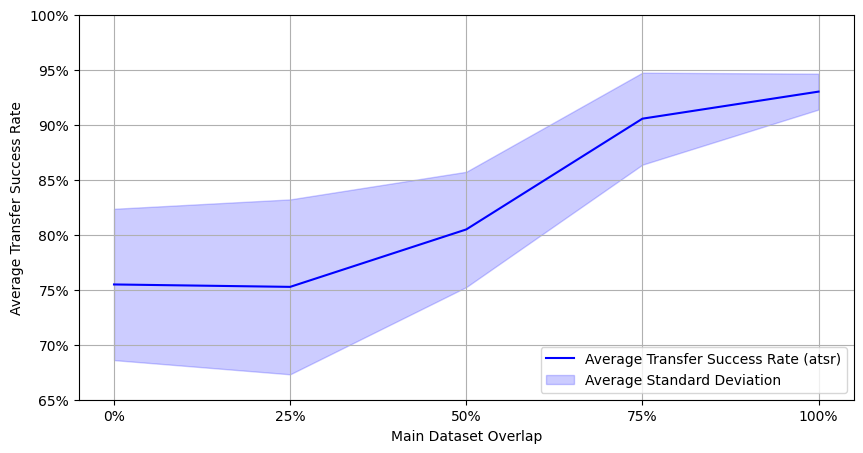

In [360]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import PercentFormatter

groups = ["0%", "25%", "50%", "75%", "100%"]

means = list(means.values())
std_devs = list(deviations.values())

# new_means, new_devs = get_transferabilities(targets[1])
# means = list(new_means.values())
# std_devs = list(new_devs.values())

print(f"Means: {means}")
print(f"Std Devs: {std_devs}")

plt.figure(figsize=(10, 5))
plt.plot(groups, means, label="Average Transfer Success Rate (atsr)", color="blue")


plt.fill_between(
    groups,
    np.array(means) - np.array(std_devs),
    np.array(means) + np.array(std_devs),
    color="blue",
    alpha=0.2,
    label="Average Standard Deviation",
)

# title = "Average Mean and Standard Deviation for Transfer Success Rate of Surrogate Models at varying levels of Dataoverlap to Target Models"
xlabel = "Main Dataset Overlap"
ylabel = "Average Transfer Success Rate"

plt.xlabel(xlabel)
plt.ylabel(ylabel)
# plt.title(title)
# plt.legend()

plt.gca().yaxis.set_major_formatter(PercentFormatter(1, decimals=0))
plt.ylim(0.7, 1)
plt.yticks(np.arange(0.65, 1.01, 0.05))

plt.legend(loc="lower right")
plt.grid(True)
plt.show()